In [7]:
#Credits goes to Niklas Donges - Founder “AM GmbH” Software Agency. We are open for business so feel free to contact me for you next project: donges@am.gmbh
#URL: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

#1. Importing the libraries
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [5]:
#2. Getting data
#URL: Explation of the dataset: https://www.kaggle.com/c/titanic/data?select=train.csv
#survival	Survival	0 = No, 1 = Yes
#pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#sex	Sex	
#Age	Age in years	
#sibsp	# of siblings / spouses aboard the Titanic	
#parch	# of parents / children aboard the Titanic	
#ticket	Ticket number	
#fare	Passenger (price)	
#cabin	Cabin number	
#embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
#Getting the Data
test_df = pd.read_csv("http: \\itabacademy.com \\bigdata \\titanic \\test.csv")
train_df = pd.read_csv("http: \\itabacademy.com \\bigdata \\titanic \\train.csv")

NameError: name 'pd' is not defined

In [4]:
#3. Data exploration and abnalysis
#Data Exploration/Analysis
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [10]:
#total contains the number of missing values for each column
total = train_df.isnull().sum().sort_values(ascending=False)
#total_all gives the number of values (missing and non missing) for each column
total_all = train_df.isnull().count().sort_values(ascending=False)
#Percent 1 is the percentage of missing values for each column
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
#Here we round percent_1 we take 1 digit after the coma
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, total_all, percent_2], axis=1, keys=['Total', 'Total all', '%'])
missing_data.head(5)

,Total,Total all,%
Cabin,687,891,77.1
Age,177,891,19.9
Embarked,2,891,0.2
PassengerId,0,891,0.0
Survived,0,891,0.0


In [11]:
train_df.groupby('Survived').count()['Name']

Survived
0    549
1    342
Name: Name, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

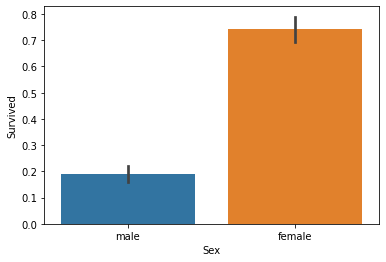

In [13]:
sns.barplot(y='Survived', x='Sex', data=train_df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

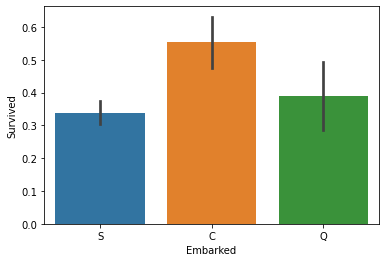

In [14]:
sns.barplot(y='Survived', x='Embarked', data=train_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

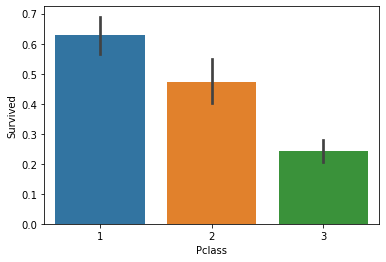

In [15]:
sns.barplot(y='Survived', x='Pclass', data=train_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

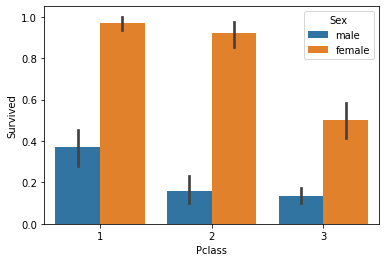

In [16]:
sns.barplot(y='Survived', x='Pclass', hue='Sex', data=train_df)

In [17]:
train_df['Fare_seg'] = (train_df['Fare'] > 14.4542).astype(int)

<AxesSubplot:xlabel='Fare_seg', ylabel='Survived'>

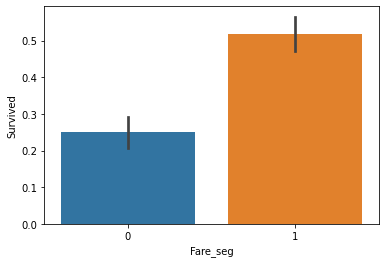

In [18]:
sns.barplot(y='Survived', x='Fare_seg', data=train_df)

In [19]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
def Fare_seg(x):
    if x < 7.910400:
        return '0 - 7.91'
    elif x < 14.454200:
        return '7.91 - 14.45'
    elif x < 31.0:
        return '14.45 - 31'
    else:
        return '>=31'

In [21]:
train_df['Fare_seg'] = train_df.apply(lambda x: Fare_seg(x.Fare), axis=1)

<AxesSubplot:xlabel='Fare_seg', ylabel='Survived'>

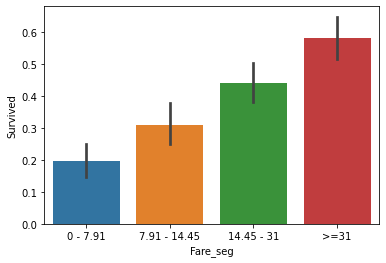

In [23]:
sns.barplot(y='Survived', x='Fare_seg', data=train_df.sort_values(by='Fare'))

In [24]:
train_df['Fare_seg'] = pd.cut(train_df.Fare, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              right=True)

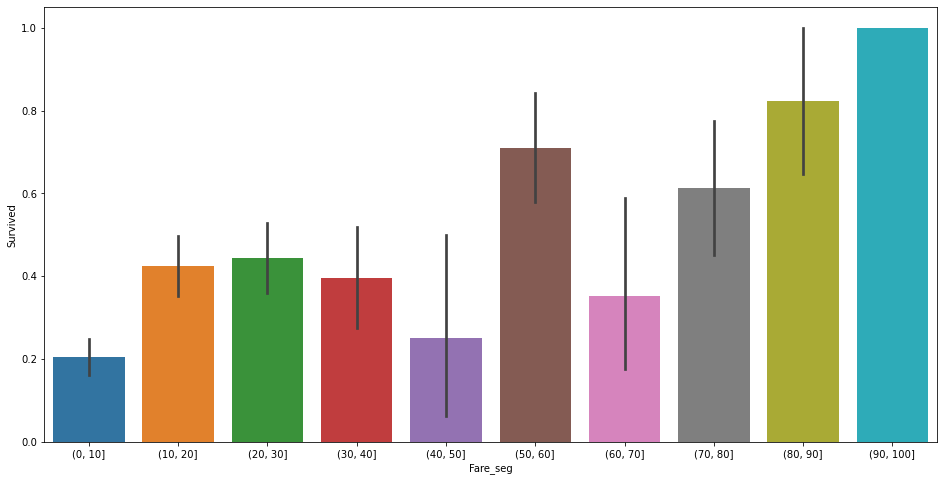

In [25]:
plt.figure(figsize=(16, 8))
sns.barplot(y='Survived', x='Fare_seg', data=train_df.sort_values(by='Fare'))
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Survived'>

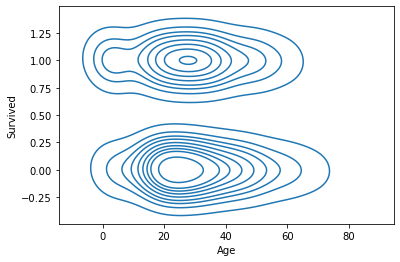

In [26]:
sns.kdeplot(x='Age', y='Survived', data=train_df)

<AxesSubplot:xlabel='Age', ylabel='Density'>

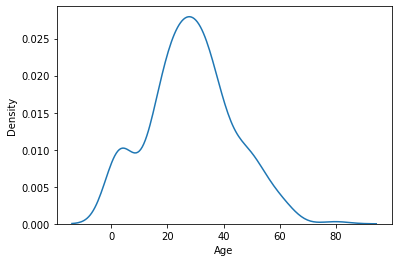

In [44]:
sns.kdeplot(x='Age', data=train_df.query('Survived==1'))

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

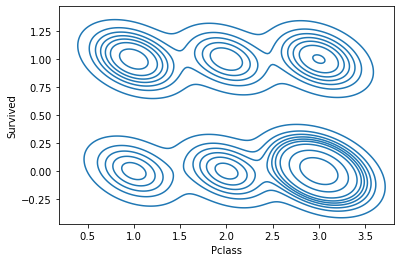

In [27]:
sns.kdeplot(x='Pclass', y='Survived', data=train_df)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

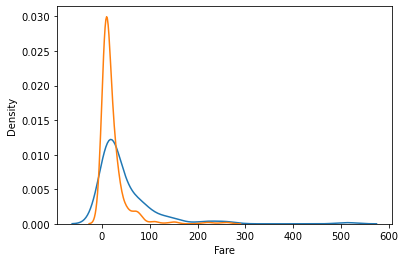

In [29]:
sns.kdeplot(x='Fare', data=train_df.query('Survived==1'))
sns.kdeplot(x='Fare', data=train_df.query('Survived==0'))

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

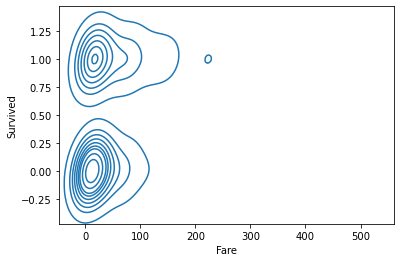

In [30]:
sns.kdeplot(x='Fare', y='Survived', data=train_df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

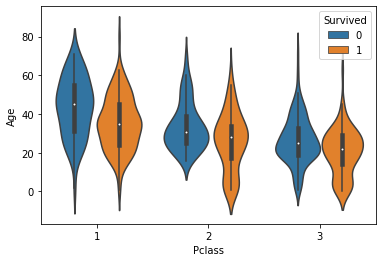

In [31]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_df)

In [32]:
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch']

In [33]:
train_df['is_alone'] = (train_df['Family_size'] == 0).astype(int)

<AxesSubplot:xlabel='Family_size', ylabel='Survived'>

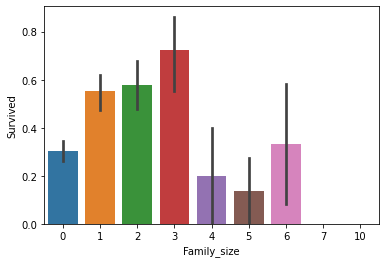

In [34]:
sns.barplot(x='Family_size', y='Survived', data=train_df)

<AxesSubplot:xlabel='Family_size', ylabel='Survived'>

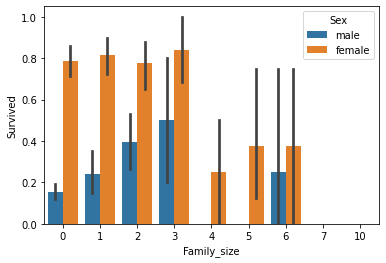

In [57]:
sns.barplot(x='Family_size', y='Survived', hue='Sex', data=train_df)

<AxesSubplot:xlabel='Family_size', ylabel='Survived'>

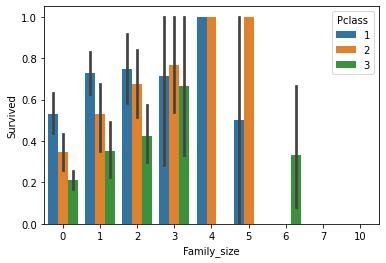

In [58]:
sns.barplot(x='Family_size', y='Survived', hue='Pclass', data=train_df)

<AxesSubplot:xlabel='Family_size', ylabel='Survived'>

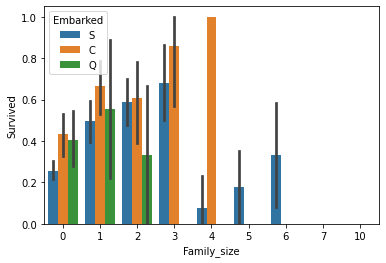

In [60]:
sns.barplot(x='Family_size', y='Survived', hue='Embarked', data=train_df)

In [61]:
def age_seg(x):
    if x < 16:
        return "junior"
    elif x < 35:
        return "adult"
    else:
        return "senior"

def fare_nb_seg(x):
    if x < 8:
        return "low"
    elif x < 23:
        return "med"
    else:
        return "high"

In [62]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_seg',
       'Family_size', 'is_alone'],
      dtype='object')

In [64]:
train_df['age_fare_nb_seg'] = train_df.apply(lambda x:age_seg(x.Age) + "_" + fare_nb_seg(x.Fare), axis=1)

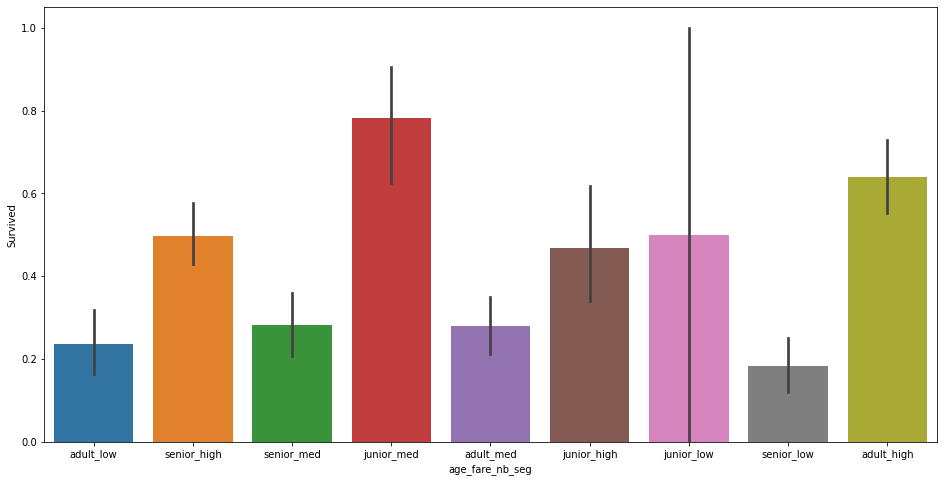

In [66]:
plt.figure(figsize=(16, 8))
sns.barplot(x='age_fare_nb_seg', y='Survived', data=train_df)
plt.show()

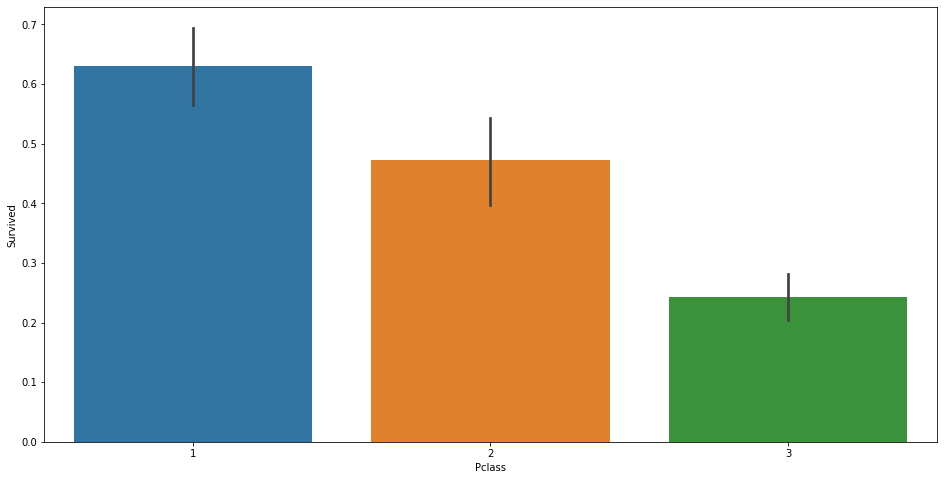

In [67]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.show()

In [72]:
train_df['has_cabin'] = 1 - train_df['Cabin'].isnull().astype(int)

In [89]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
train_df['age_embarked'] = train_df.apply(lambda x:age_seg(x.Age) + "_" + x.Embarked, axis=1)

In [90]:
train_df['sex_class'] = train_df['Sex'] + "_" + train_df['Pclass'].astype(str)

In [103]:
train_df['fare_nb'] = train_df['Fare'] / (train_df['Family_size']+1)
train_df['new_pclass'] = pd.cut(train_df['fare_nb'], 
                                      bins=[-1, 3, 8, 12, 30, 870], right=False,
                                      labels = ['special', 'third class', 'second class', 'first class cabin', 'first class parlor suite'])

In [104]:
train_df.groupby('new_pclass').agg({'fare_nb':['min', 'median', 'max']})

fare_nb                   
                              min   median       max
new_pclass                                          
special                    0.0000   0.0000    2.8875
third class                3.1250   7.2292    7.9250
second class               8.0292   8.6833   11.5000
first class cabin         12.0000  15.0750   29.7000
first class parlor suite  30.0000  45.0000  512.3292

In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Name             891 non-null    object  
 4   Sex              891 non-null    object  
 5   Age              714 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             891 non-null    float64 
 10  Cabin            204 non-null    object  
 11  Embarked         891 non-null    object  
 12  Fare_seg         823 non-null    category
 13  Family_size      891 non-null    int64   
 14  is_alone         891 non-null    int32   
 15  age_fare_nb_seg  891 non-null    object  
 16  has_cabin        891 non-null    int32   
 1

In [111]:
train_df['Age'].median()

28.0

In [112]:
train_df['Age'] = train_df['Age'].fillna(28.0)

In [105]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [113]:
train_df['Cabin'] = train_df['Cabin'].fillna('Z')

In [114]:
train_df['Deck'] = train_df.apply(lambda x: x.Cabin[0], axis=1)

In [119]:
train_df.loc[train_df['Deck']=='T', 'Deck'] = 'F'

In [120]:
train_df.Cabin.unique()

array(['Z', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [137]:
def number_cabins(x):
    if x == 'Z':
        return 0
    else:
        return len(x.split(' '))

In [142]:
train_df['number_cabins'] = train_df.apply(lambda x: number_cabins(x.Cabin), axis=1)

In [145]:
train_df['number_cabins_nb'] = train_df['number_cabins'] / (train_df['Family_size'] + 1)

In [125]:
train_df['has_age'] = 1 - ag.isnull().astype(int)

<AxesSubplot:xlabel='has_age', ylabel='Survived'>

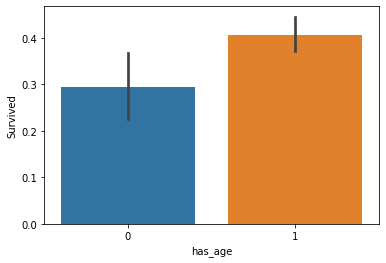

In [126]:
sns.barplot(x='has_age', y='Survived', data=train_df)

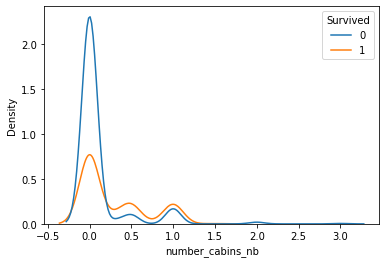

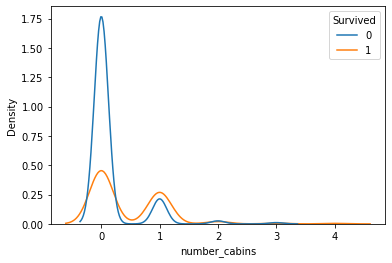

In [147]:
for col in ['number_cabins_nb', 'number_cabins']:
    sns.kdeplot(x=col, hue='Survived', data=train_df)
    plt.show()

In [151]:
train_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [156]:
train_df['title'] = train_df.apply(lambda x: x.Name.split(',')[1].split('.')[0].strip(), axis=1)

In [157]:
train_df.title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Ms                1
Jonkheer          1
Lady              1
Sir               1
Don               1
Mme               1
Capt              1
the Countess      1
Name: title, dtype: int64

In [163]:
train_df['title_'] = train_df['title'].replace({
                                                'Dr' : 'Special',
                                                'Rev' : 'Special',
                                                'Col' : 'Special',
                                                'Major' : 'Special',
                                                'Mlle' : 'Miss',
                                                'Ms':'Miss',                
                                                'Jonkheer':'Special',          
                                                'Lady' : 'Special',              
                                                'Sir' : 'Special',               
                                                'Don' : 'Special',               
                                                'Mme' : 'Mrs',               
                                                'Capt' : 'Special',              
                                                'the Countess' : 'Special'
                                               })

In [164]:
train_df['title_'].value_counts()

Mr         517
Miss       185
Mrs        126
Master      40
Special     23
Name: title_, dtype: int64

<AxesSubplot:xlabel='title_', ylabel='Survived'>

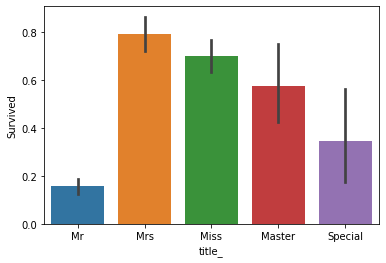

In [165]:
sns.barplot(y='Survived', x='title_', data=train_df)

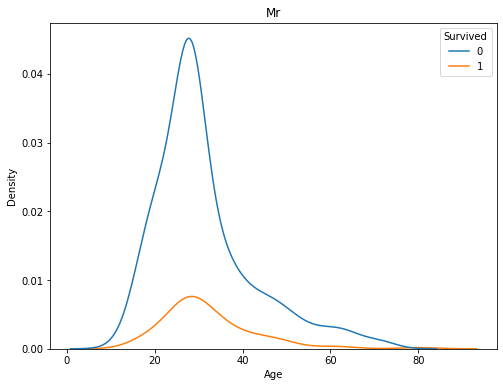

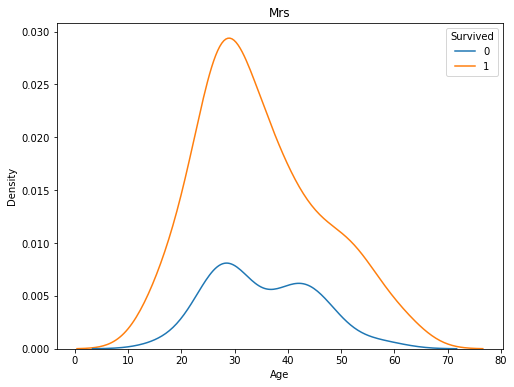

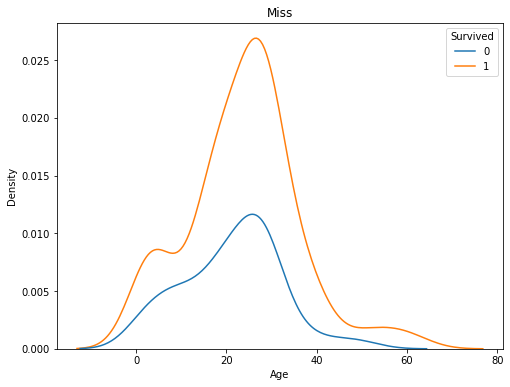

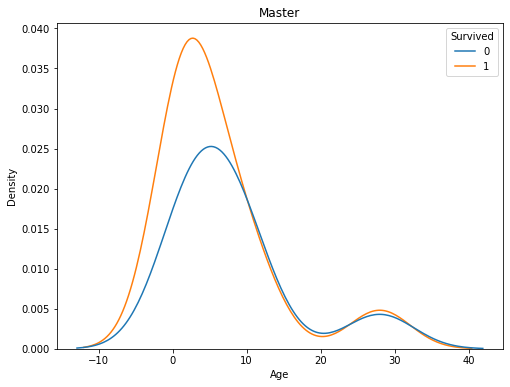

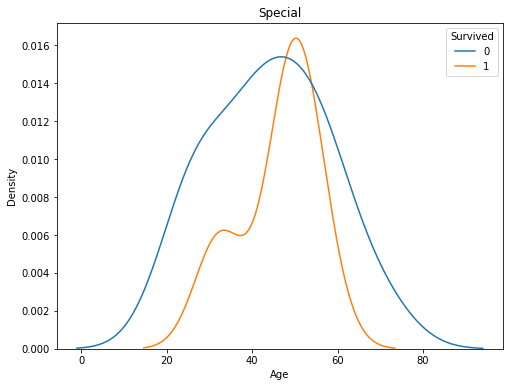

In [172]:
for col in train_df.title_.unique():
    plt.figure(figsize=(8, 6))
    sns.kdeplot(x='Age', hue='Survived', data=train_df.query('title_=="{0}"'.format(col)))
    plt.title(col)
    plt.show()

In [ ]:
sns.kdeplot(x='Age', hue='Survived', data=train_df.query('title_=="{0}"'.format('Mrs')))

In [173]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_seg',
       'Family_size', 'is_alone', 'age_fare_nb_seg', 'has_cabin',
       'age_embarked', 'sex_class', 'fare_nb', 'new_pclass', 'Deck', 'has_age',
       'number_cabins', 'number_cabins_nb', 'title', 'title_'],
      dtype='object')

In [181]:
predictors = ['Pclass', 'Sex', 'Age', 'Embarked', 'Fare_seg', 'Family_size', 
              'is_alone', 'age_fare_nb_seg', 'has_cabin', 'age_embarked', 
              'sex_class', 'fare_nb', 'new_pclass', 'Deck', 'has_age',
              'number_cabins', 'number_cabins_nb', 'title_']

In [184]:
train_df[predictors].head(3)

,Pclass,Sex,Age,Embarked,Fare_seg,Family_size,is_alone,age_fare_nb_seg,has_cabin,age_embarked,sex_class,fare_nb,new_pclass,Deck,has_age,number_cabins,number_cabins_nb,title_
0,3,male,22.0,S,"(0, 10]",1,0,adult_low,0,adult_S,male_3,3.62500,third class,Z,1,0,0.0,Mr
1,1,female,38.0,C,"(70, 80]",1,0,senior_high,1,senior_C,female_1,35.64165,first class parlor suite,C,1,1,0.5,Mrs
2,3,female,26.0,S,"(0, 10]",0,1,adult_low,0,adult_S,female_3,7.92500,third class,Z,1,0,0.0,Miss


In [207]:
X, y = pd.get_dummies(train_df[predictors]), train_df['Survived']

In [209]:
X.head(3)

,Pclass,Age,Family_size,is_alone,has_cabin,fare_nb,has_age,number_cabins,number_cabins_nb,Sex_female,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Z,title__Master,title__Miss,title__Mr,title__Mrs,title__Special
0,3,22.0,1,0,0,3.62500,1,0,0.0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,38.0,1,0,1,35.64165,1,1,0.5,1,...,0,0,0,0,0,0,0,0,1,0
2,3,26.0,0,1,0,7.92500,1,0,0.0,1,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
%pip install sklearn

In [211]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=72)

In [212]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [215]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, model.predict(X_train))

0.9915730337078652

In [216]:
accuracy_score(y_test, model.predict(X_test))

0.7988826815642458

In [218]:
from sklearn.metrics import classification_report

print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [220]:
1 - train_df.Survived.mean()

0.6161616161616161

In [221]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [222]:
print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       101
           1       0.78      0.72      0.75        78

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

NameError: name 'X' is not defined

In [225]:
print(classification_report(lr.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       103
           1       0.82      0.78      0.80        76

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



In [226]:
import xgboost as xgb

In [ ]:
%pip install xgboost

In [241]:
X_train.columns

Index(['Pclass', 'Age', 'Family_size', 'is_alone', 'has_cabin', 'fare_nb',
       'has_age', 'number_cabins', 'number_cabins_nb', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare_seg_010',
       'Fare_seg_1020', 'Fare_seg_2030', 'Fare_seg_3040', 'Fare_seg_4050',
       'Fare_seg_5060', 'Fare_seg_6070', 'Fare_seg_7080', 'Fare_seg_8090',
       'Fare_seg_90100', 'age_fare_nb_seg_adult_high',
       'age_fare_nb_seg_adult_low', 'age_fare_nb_seg_adult_med',
       'age_fare_nb_seg_junior_high', 'age_fare_nb_seg_junior_low',
       'age_fare_nb_seg_junior_med', 'age_fare_nb_seg_senior_high',
       'age_fare_nb_seg_senior_low', 'age_fare_nb_seg_senior_med',
       'age_embarked_adult_C', 'age_embarked_adult_Q', 'age_embarked_adult_S',
       'age_embarked_junior_C', 'age_embarked_junior_Q',
       'age_embarked_junior_S', 'age_embarked_senior_C',
       'age_embarked_senior_Q', 'age_embarked_senior_S', 'sex_class_female_1',
       'sex_class_female_2', 'sex_

In [232]:
xbg_classifier = xgb.XGBClassifier()
xbg_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [234]:
X_test.columns = X_train.columns

In [235]:
print(classification_report(xbg_classifier.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       102
           1       0.81      0.75      0.78        77

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179



In [242]:
from sklearn.model_selection import cross_val_score

results = cross_val_score(xbg_classifier, X_train, y_train, cv=10)

In [243]:
results

array([0.875     , 0.88888889, 0.74647887, 0.83098592, 0.74647887,
       0.78873239, 0.85915493, 0.78873239, 0.81690141, 0.85915493])

In [240]:
results.mean()

0.8174431202600217

In [244]:
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier()

grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [3, 5, 7]
}

gs = GridSearchCV(estimator=model, 
                  param_grid=grid, 
                  scoring='precision', 
                  n_jobs=-1, 
                  cv=5, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [245]:
print('best params {0}'.format(gs.best_params_))

best params {'max_depth': 3, 'n_estimators': 50}


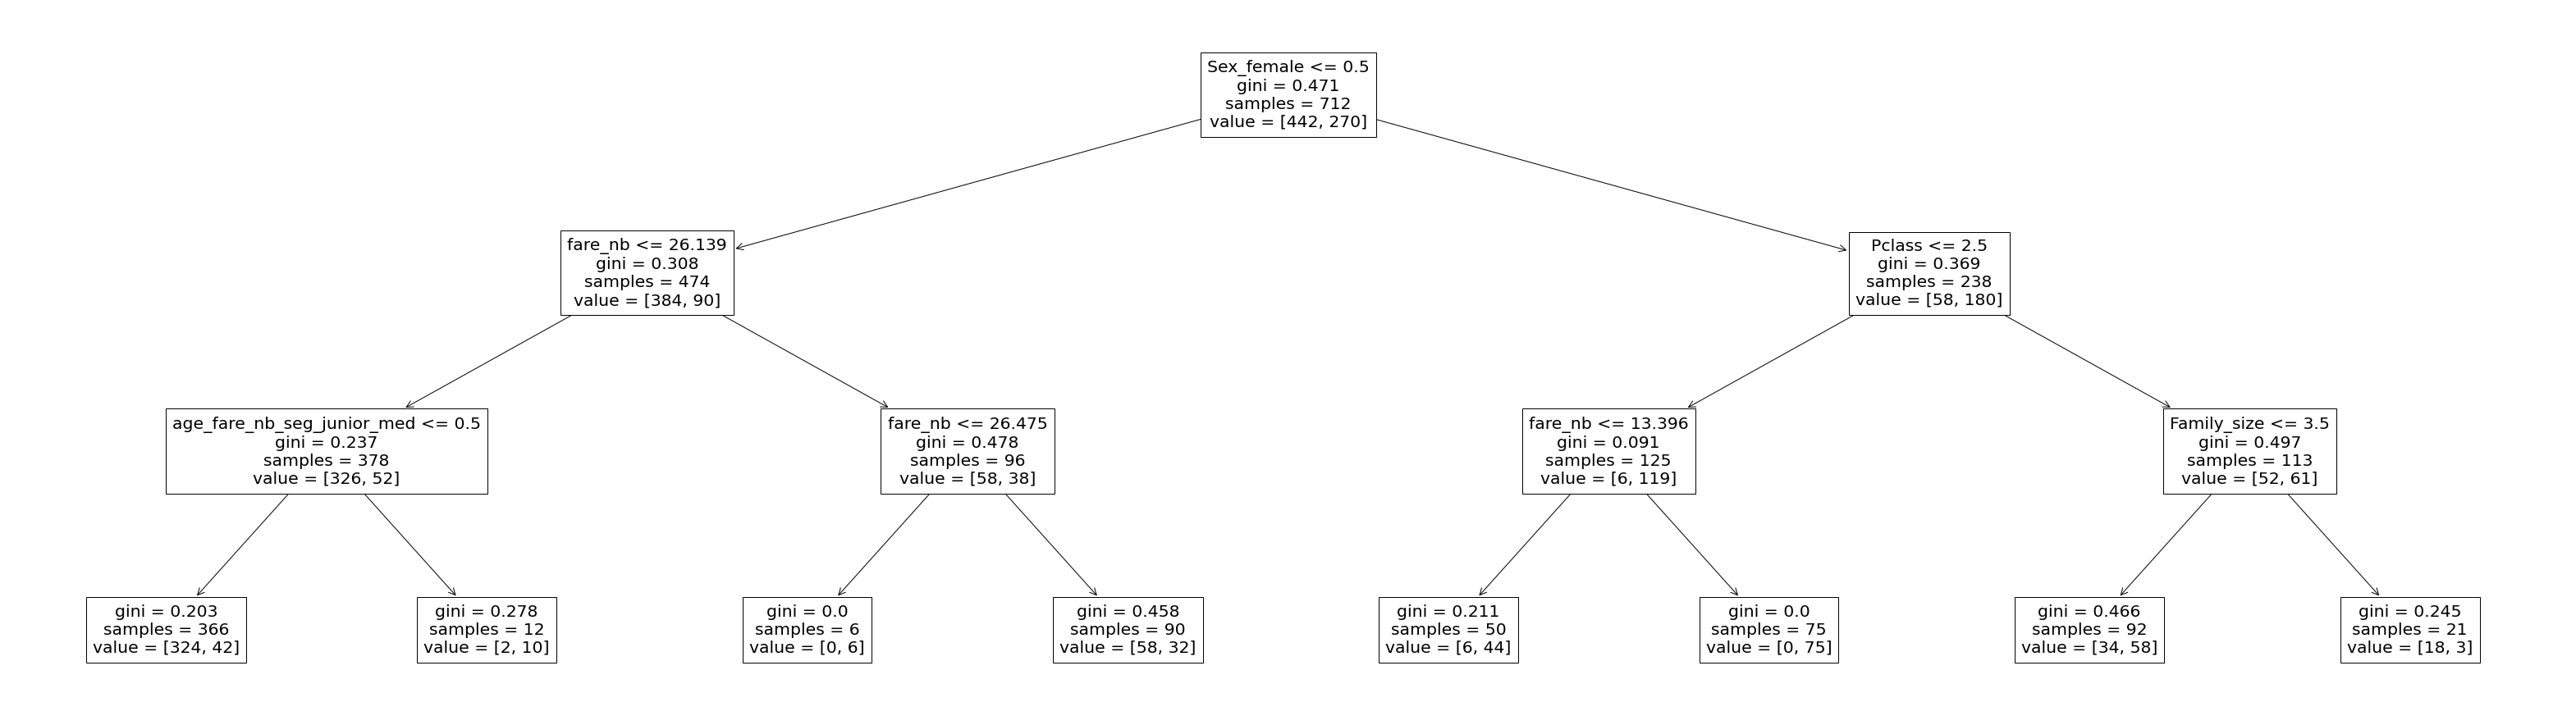

In [263]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

plt.figure(figsize=(56,16))
tree.plot_tree(clf, feature_names=X_train.columns)
plt.show()

In [285]:
from sklearn.decomposition import PCA

for k in range(1, 7):
    pca = PCA(n_components=k)

    pca.fit(X_train)
    
    ev = pca.explained_variance_ratio_.sum()
    
    print('{0} => {1:.1%}'.format(k, ev))

1 => 89.5%
2 => 99.4%
3 => 99.6%
4 => 99.7%
5 => 99.7%
6 => 99.8%


In [268]:
pca.singular_values_

array([1003.98989246,  334.13602248,   44.04611987])

In [271]:
import sklearn
print(sklearn.__version__)

0.24.1


In [276]:
X_transformed = pca.transform(X_train)

In [282]:
X_train.head(3)

,Pclass,Age,Family_size,is_alone,has_cabin,fare_nb,has_age,number_cabins,number_cabins_nb,Sex_female,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Z,title__Master,title__Miss,title__Mr,title__Mrs,title__Special
292,2,36.0,0,1,1,12.875,1,1,1.0,0,...,1,0,0,0,0,0,0,1,0,0
674,2,28.0,0,1,0,0.000,0,0,0.0,0,...,0,0,0,0,1,0,0,1,0,0
121,3,28.0,0,1,0,8.050,0,0,0.0,0,...,0,0,0,0,1,0,0,1,0,0


In [283]:
pd.DataFrame(X_transformed).head(3)

,0,1,2
0,-6.692163,7.034773,-0.616570
1,-20.012416,-0.241159,-1.010220
2,-11.993464,-0.722236,-1.353345


In [286]:
pca = PCA(n_components=2)

X_train_transformed = pca.fit_transform(X_train)

In [287]:
X_train_transformed

array([[ -6.69216253,   7.03477255],
       [-20.01241567,  -0.24115898],
       [-11.99346431,  -0.72223634],
       ...,
       [-12.29818337,  -0.76853613],
       [-16.31592312, -20.68612242],
       [-12.82169647,   4.19980366]])

In [304]:
model = xgb.XGBClassifier()

grid = {
    'n_estimators' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10]
}

gs = GridSearchCV(estimator=model, 
                  param_grid=grid, 
                  scoring='roc_auc', 
                  n_jobs=-1, 
                  cv=5, verbose=0)
gs.fit(X_train_transformed, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [305]:
print(gs.best_params_)

{'max_depth': 3, 'n_estimators': 8}


In [306]:
X_test_transformed = pca.transform(X_test)
print(classification_report(gs.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       117
           1       0.61      0.71      0.66        62

    accuracy                           0.74       179
   macro avg       0.72      0.74      0.73       179
weighted avg       0.76      0.74      0.75       179



In [327]:
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier()

grid = {
    'n_estimators' : [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
    'max_depth' : [2, 3, 4, 5, 6, 7]
}

gs = GridSearchCV(estimator=model, 
                  param_grid=grid, 
                  scoring='roc_auc', 
                  n_jobs=-1, 
                  cv=5, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [328]:
print(gs.best_params_)

{'max_depth': 6, 'n_estimators': 16}


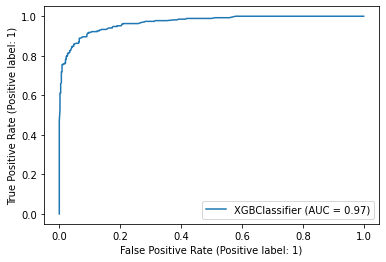

In [329]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs.best_estimator_, X_train, y_train)

In [331]:
print(classification_report(gs.best_estimator_.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       104
           1       0.83      0.80      0.82        75

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [332]:
print(classification_report(gs.best_estimator_.predict(X_train), y_train))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       473
           1       0.83      0.93      0.88       239

    accuracy                           0.91       712
   macro avg       0.89      0.92      0.90       712
weighted avg       0.92      0.91      0.91       712



In [334]:
model = xgb.XGBClassifier(**gs.best_params_)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=16, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [347]:
model.predict(X_test.loc[X_test.index==9,])[0]

1

In [354]:
%pip install sklearn==1.0.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn==1.0.0 (from versions: 0.0)
ERROR: No matching distribution found for sklearn==1.0.0
You should consider upgrading via the 'C:\Users\063255\Projects\volumes_prediction\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [356]:
%pip install SHAP

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\063255\Projects\volumes_prediction\env\Scripts\python.exe -m pip install --upgrade pip' command.


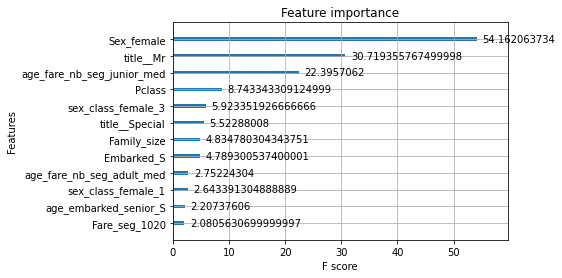

In [367]:
from xgboost import plot_importance

#gain : relative contribution to making the prediction
#coverage : number of time it is in decision node
#weight : number of time it is in a split
#['weight', 'gain', 'cover', 'total_gain', 'total_cover']

ax = plot_importance(model, importance_type='gain', max_num_features=12)
fig = ax.figure
fig.set_size_inches(6, 4)
#plt.show()

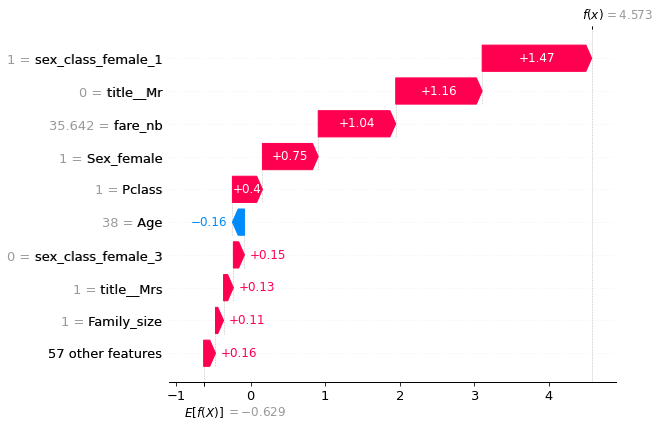

In [376]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[1])

In [379]:
import joblib

joblib.dump(model, 'model_titanic_xgb.m')

['model_titanic_xgb.m']

In [382]:
model_titanic = joblib.load('model_titanic_xgb.m')

In [383]:
print(classification_report(model_titanic.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       104
           1       0.83      0.80      0.82        75

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [384]:
X_test.to_csv('X_test.csv')

In [387]:
pd.DataFrame(y_test).to_csv('y_test.csv')

In [400]:
import sys
import os

print(os.name)

nt


In [397]:
di = {
    'project_name':'Machine Learning from Disaster',
    'Author' : 'Ismail',
    'Date' : '27/01/2022',
    'Entity' : 'Orange digital Center',
    'model' : model,
    'version' : '0.1.0',
    'data_columns' : X_train.columns,
    'columns_static_infos':{
        'Age' : {
            'mean' : 28,
            'std' : 4.6
        },
        'Pclass' : {
            'classes' : [1, 2, 3]
        }
    },
    'Session_infos':{
        'OS' : {
            'core' : os.name
        }
    }
}

In [389]:
joblib.dump(di, 'model_infos.xbar')

['model_infos.xbar']

In [390]:
loaded_model = joblib.load('model_infos.xbar')

In [393]:
loaded_model['model'].predict(X_test)

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1], dtype=int64)

In [396]:
di['data_columns']

Index(['Pclass', 'Age', 'Family_size', 'is_alone', 'has_cabin', 'fare_nb',
       'has_age', 'number_cabins', 'number_cabins_nb', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare_seg_010',
       'Fare_seg_1020', 'Fare_seg_2030', 'Fare_seg_3040', 'Fare_seg_4050',
       'Fare_seg_5060', 'Fare_seg_6070', 'Fare_seg_7080', 'Fare_seg_8090',
       'Fare_seg_90100', 'age_fare_nb_seg_adult_high',
       'age_fare_nb_seg_adult_low', 'age_fare_nb_seg_adult_med',
       'age_fare_nb_seg_junior_high', 'age_fare_nb_seg_junior_low',
       'age_fare_nb_seg_junior_med', 'age_fare_nb_seg_senior_high',
       'age_fare_nb_seg_senior_low', 'age_fare_nb_seg_senior_med',
       'age_embarked_adult_C', 'age_embarked_adult_Q', 'age_embarked_adult_S',
       'age_embarked_junior_C', 'age_embarked_junior_Q',
       'age_embarked_junior_S', 'age_embarked_senior_C',
       'age_embarked_senior_Q', 'age_embarked_senior_S', 'sex_class_female_1',
       'sex_class_female_2', 'sex_